In [2]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.0 MB/s eta 0:00:00a 0:00:01m


In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import numpy as np

## Effect of Depth on Accuracy

In [3]:
pt = './ref/effect_of_depth.csv'
df = pd.read_csv(pt)
df

,#,Model,Arch,NumEpochs,TrainingTime,TrainingTimePerEpoch,InferenceLatency,Accuracy,Flops,Parameters
0,1,MLP,Input(784)-Hidden(512)-Output(10),2,4.52,2.26,0.0057,0.960,813056,407050
1,2,MLP,Input(784)-Hidden(512)-Hidden(512)-Output(10),2,4.83,2.41,0.0061,0.963,1337344,669706
2,3,MLP,Input(784)-Hidden(512)-Hidden(512)-Hidden(512)...,2,5.30,2.65,0.0062,0.964,1861632,932362


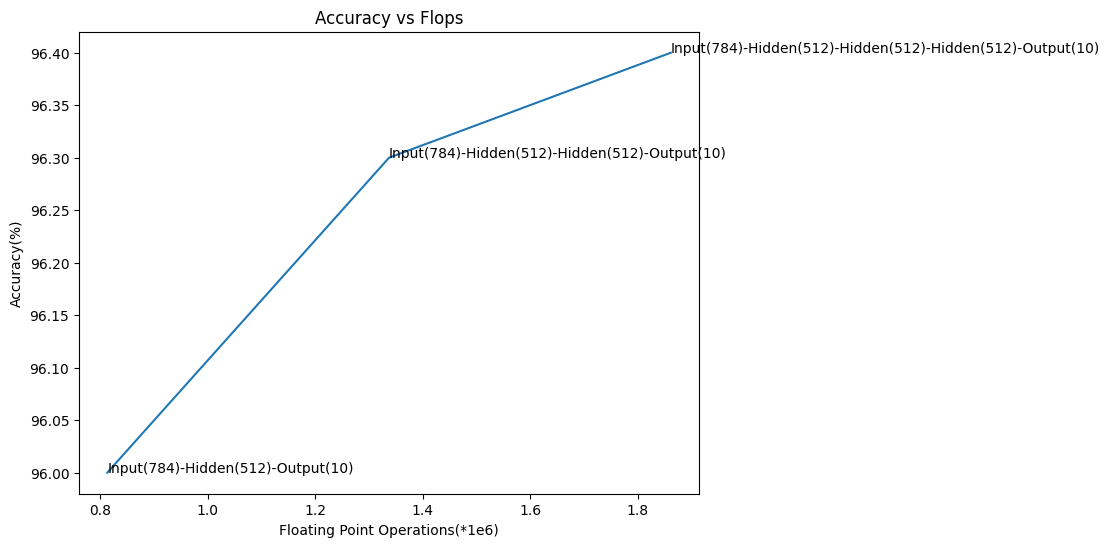

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['Flops']/1e6,df['Accuracy']*100)
plt.title('Accuracy vs Flops')
plt.xlabel('Floating Point Operations(*1e6)')
plt.ylabel('Accuracy(%)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['Flops']/1e6,row['Accuracy']*100),(row['Flops']/1e6,row['Accuracy']*100))
plt.show()

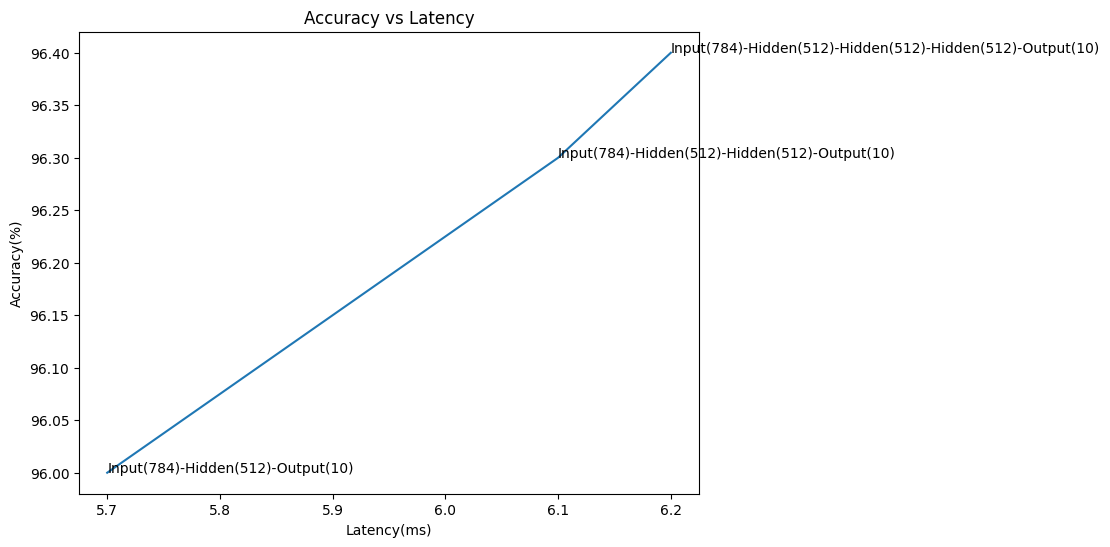

In [5]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['InferenceLatency']*1000,df['Accuracy']*100)
plt.title('Accuracy vs Latency')
plt.xlabel('Latency(ms)')
plt.ylabel('Accuracy(%)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['InferenceLatency']*1000,row['Accuracy']*100),(row['InferenceLatency']*1000,row['Accuracy']*100))
plt.show()

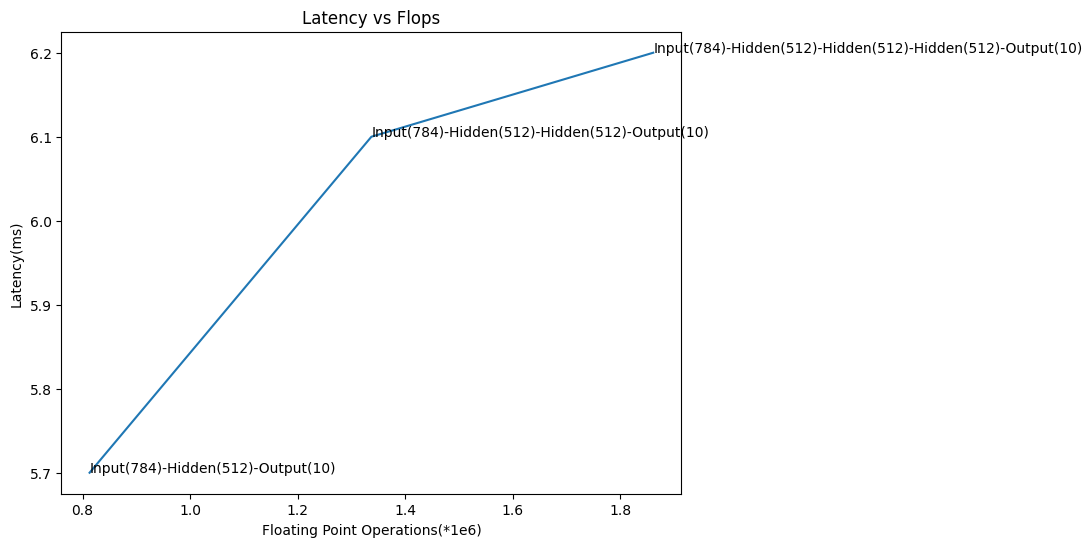

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['Flops']/1e6,df['InferenceLatency']*1000)
plt.title('Latency vs Flops')
plt.xlabel('Floating Point Operations(*1e6)')
plt.ylabel('Latency(ms)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['Flops']/1e6,row['InferenceLatency']*1000),(row['Flops']/1e6,row['InferenceLatency']*1000))
plt.show()

## Effect of Width on Accuracy

In [7]:
pt = './ref/effect_of_width.csv'
df = pd.read_csv(pt)
df

,#,Model,Arch,NumEpoch,TrainingTime,TrainingTimeperEpoch,InferenceLatency,Accuracy,Flops,Parameter
0,1,MLP,Input(784)-Hidden(128)-Output(10),2,3.93,1.97,0.0053,0.937,203264,101770
1,2,MLP,Input(784)-Hidden(256)-Output(10),2,4.15,2.08,0.0055,0.958,406528,203530
2,3,MLP,Input(784)-Hidden(512)-Output(10),2,4.52,2.26,0.0060,0.962,813056,407050
3,4,MLP,Input(784)-Hidden(1024)-Output(10),2,4.96,2.48,0.0062,0.967,1626112,814090


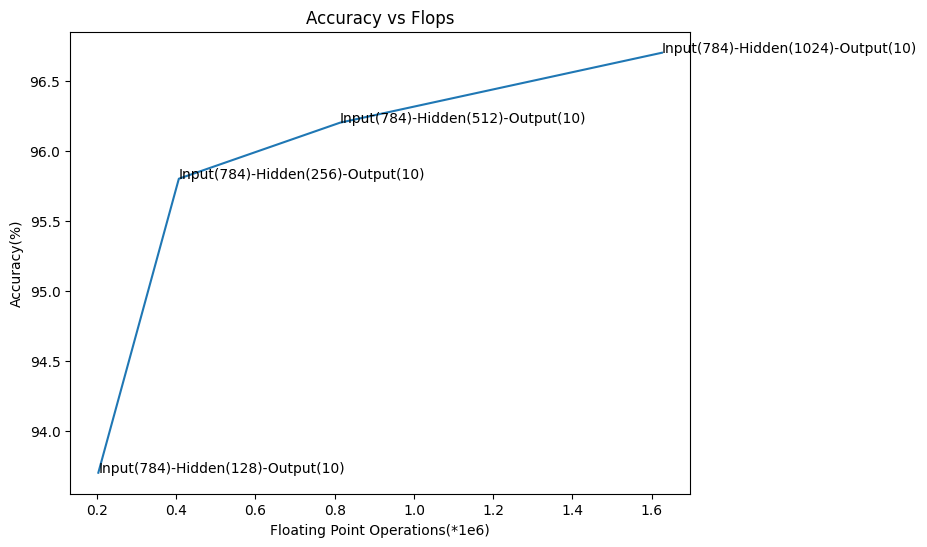

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['Flops']/1e6,df['Accuracy']*100)
plt.title('Accuracy vs Flops')
plt.xlabel('Floating Point Operations(*1e6)')
plt.ylabel('Accuracy(%)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['Flops']/1e6,row['Accuracy']*100),(row['Flops']/1e6,row['Accuracy']*100))
plt.show()

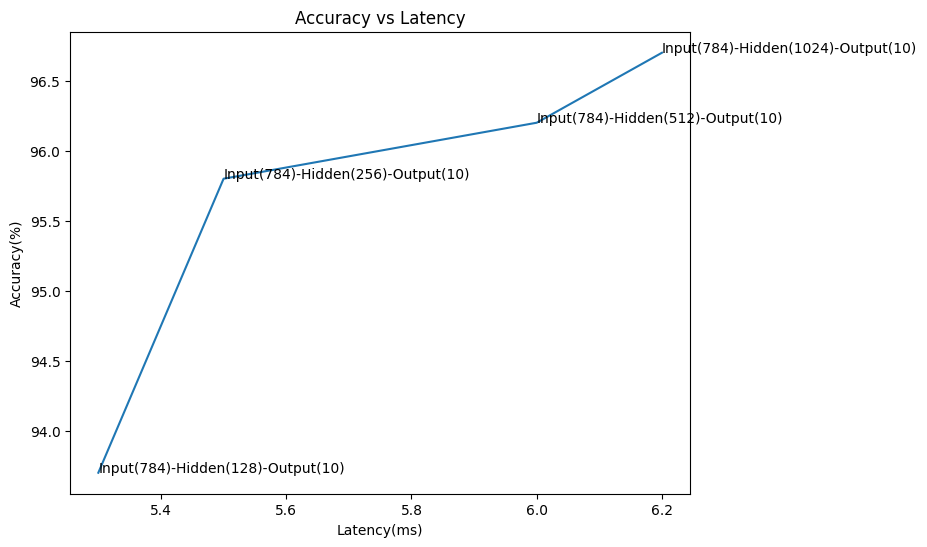

In [9]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['InferenceLatency']*1000,df['Accuracy']*100)
plt.title('Accuracy vs Latency')
plt.xlabel('Latency(ms)')
plt.ylabel('Accuracy(%)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['InferenceLatency']*1000,row['Accuracy']*100),(row['InferenceLatency']*1000,row['Accuracy']*100))
plt.show()

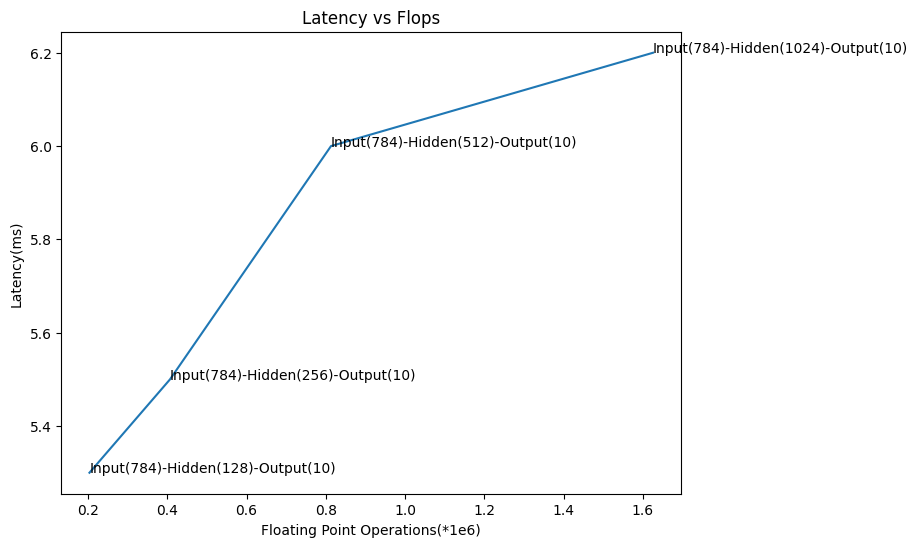

In [10]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
plt.plot(df['Flops']/1e6,df['InferenceLatency']*1000)
plt.title('Latency vs Flops')
plt.xlabel('Floating Point Operations(*1e6)')
plt.ylabel('Latency(ms)')
for i,row in df.iterrows():
    ax.annotate(row['Arch'],(row['Flops']/1e6,row['InferenceLatency']*1000),(row['Flops']/1e6,row['InferenceLatency']*1000))
plt.show()

## Effects of Batch Size

In [17]:
pt = './ref/effect_of_batch_size.csv'
df = pd.read_csv(pt)
df

,#,Model,Arch,NumEpochs,BatchSize,ModelSize,Parameters,Flops,TrainingTimePerEpoch,InferenceLatency,Accuracy,EnergyConsumption
0,1,MLP-1,Input(784)-Hidden(1024)-Output(10),2,1,9.8,814090,1626112,228.30,57.4,93.0,654.5
1,2,MLP-1,Input(784)-Hidden(1024)-Output(10),2,16,9.8,814090,1626112,19.20,23.8,96.7,271.6
2,3,MLP-1,Input(784)-Hidden(1024)-Output(10),2,64,9.8,814090,1626112,8.57,5.1,96.4,58.2
3,4,MLP-1,Input(784)-Hidden(1024)-Output(10),2,128,9.8,814090,1626112,6.96,4.3,96.4,49.0
4,5,MLP-2,Input(400)-Hidden(1024)-Hidden(1024)-Output(10),2,1,17.7,1470474,2936832,408.10,88.8,93.6,1012.6
5,6,MLP-2,Input(400)-Hidden(1024)-Hidden(1024)-Output(10),2,16,17.7,1470474,2936832,33.50,32.0,95.3,364.8
6,7,MLP-2,Input(400)-Hidden(1024)-Hidden(1024)-Output(10),2,64,17.7,1470474,2936832,13.20,10.3,97.2,117.2
7,8,MLP-2,Input(400)-Hidden(1024)-Hidden(1024)-Output(10),2,128,17.7,1470474,2936832,10.20,9.0,96.6,102.6


In [44]:
df0 = df[['Model','ModelSize','Parameters','Flops']].drop_duplicates()
df0

,Model,ModelSize,Parameters,Flops
0,MLP-1,9.8,814090,1626112
4,MLP-2,17.7,1470474,2936832


Text(0.5, 0, 'Model')

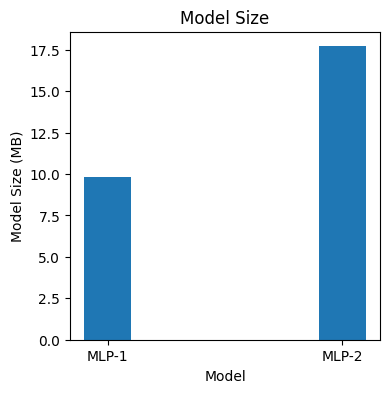

In [57]:
fig = plt.figure(figsize=(4,4))
plt.bar(df0['Model'],df0['ModelSize'],width=0.2)
plt.title('Model Size')
plt.ylabel('Model Size (MB)')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

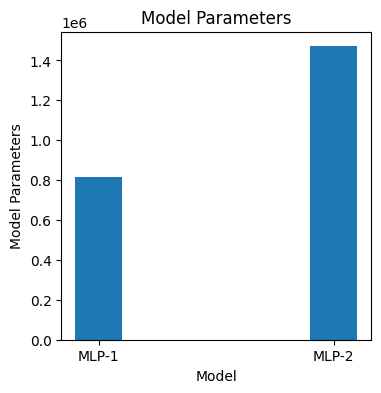

In [60]:
fig = plt.figure(figsize=(4,4))
plt.bar(df0['Model'],df0['Parameters'],width=0.2)
plt.title('Model Parameters')
plt.ylabel('Model Parameters')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

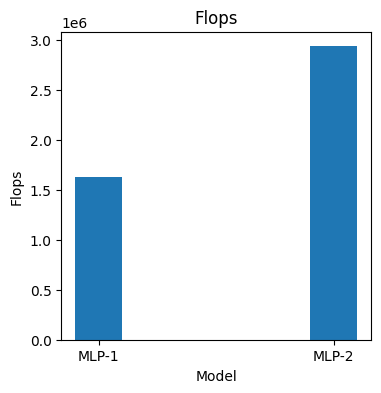

In [61]:
fig = plt.figure(figsize=(4,4))
plt.bar(df0['Model'],df0['Flops'],width=0.2)
plt.title('Flops')
plt.ylabel('Flops')
plt.xlabel('Model')

In [19]:
df1 = df[df['Model']=='MLP-1'].reset_index(drop=True)
df2 = df[df['Model']=='MLP-2'].reset_index(drop=True)

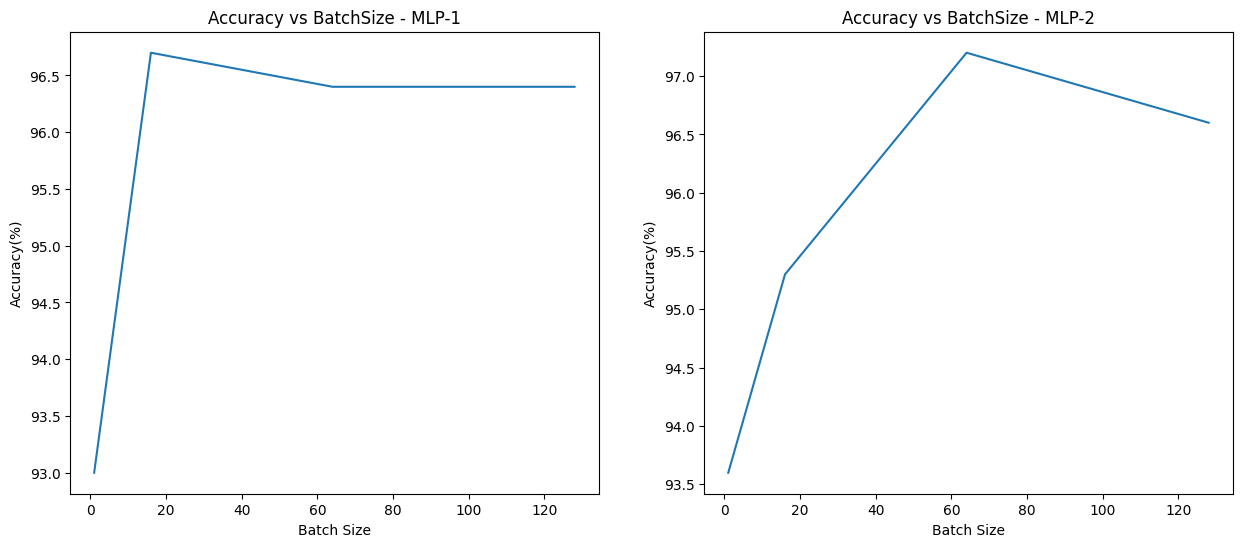

In [34]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(df1['BatchSize'],df1['Accuracy'])
plt.title('Accuracy vs BatchSize - MLP-1')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy(%)')

plt.subplot(1,2,2)
plt.plot(df2['BatchSize'],df2['Accuracy'])
plt.title('Accuracy vs BatchSize - MLP-2')
plt.xlabel('Batch Size')
plt.ylabel('Accuracy(%)')
plt.show()

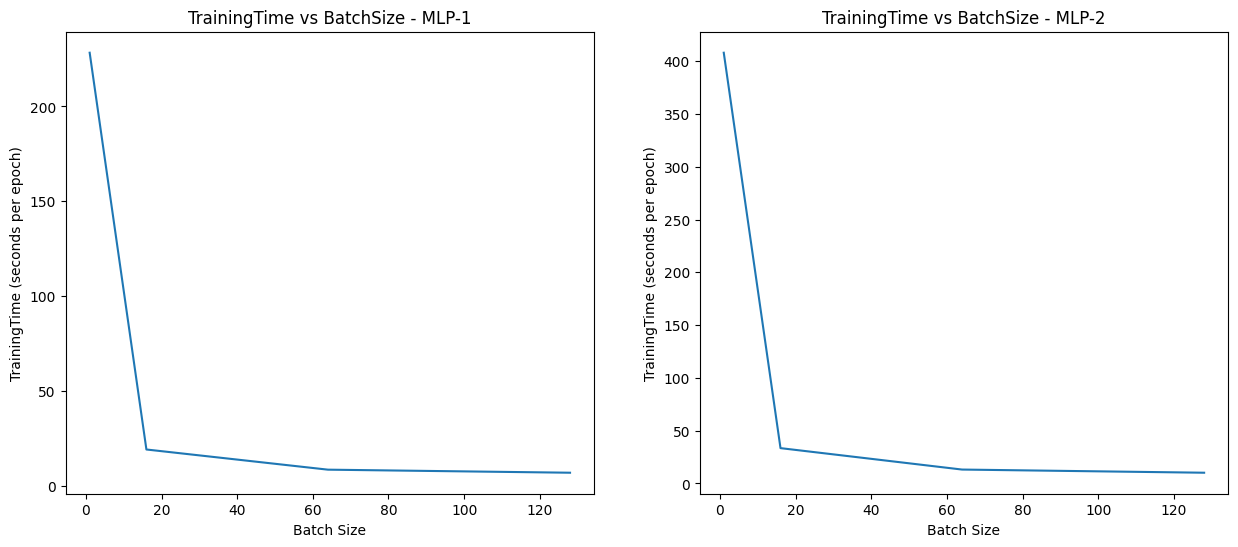

In [40]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(df1['BatchSize'],df1['TrainingTimePerEpoch'])
plt.title('TrainingTime vs BatchSize - MLP-1')
plt.xlabel('Batch Size')
plt.ylabel('TrainingTime (seconds per epoch)')

plt.subplot(1,2,2)
plt.plot(df2['BatchSize'],df2['TrainingTimePerEpoch'])
plt.title('TrainingTime vs BatchSize - MLP-2')
plt.xlabel('Batch Size')
plt.ylabel('TrainingTime (seconds per epoch)')
plt.show()

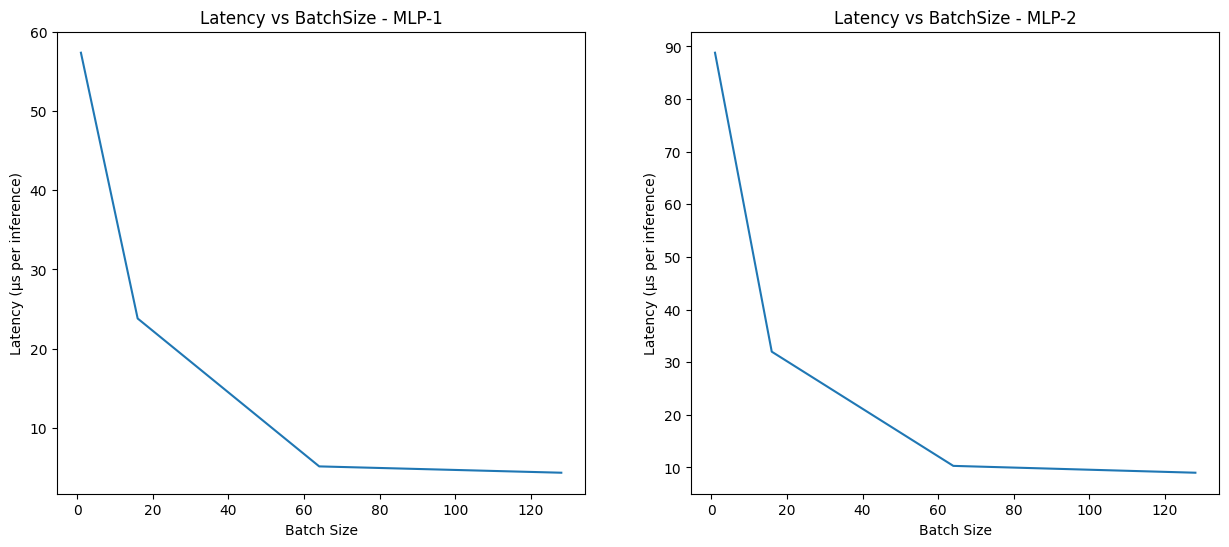

In [41]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(df1['BatchSize'],df1['InferenceLatency'])
plt.title('Latency vs BatchSize - MLP-1')
plt.xlabel('Batch Size')
plt.ylabel('Latency (\u03BCs per inference)')

plt.subplot(1,2,2)
plt.plot(df2['BatchSize'],df2['InferenceLatency'])
plt.title('Latency vs BatchSize - MLP-2')
plt.xlabel('Batch Size')
plt.ylabel('Latency (\u03BCs per inference)')
plt.show()

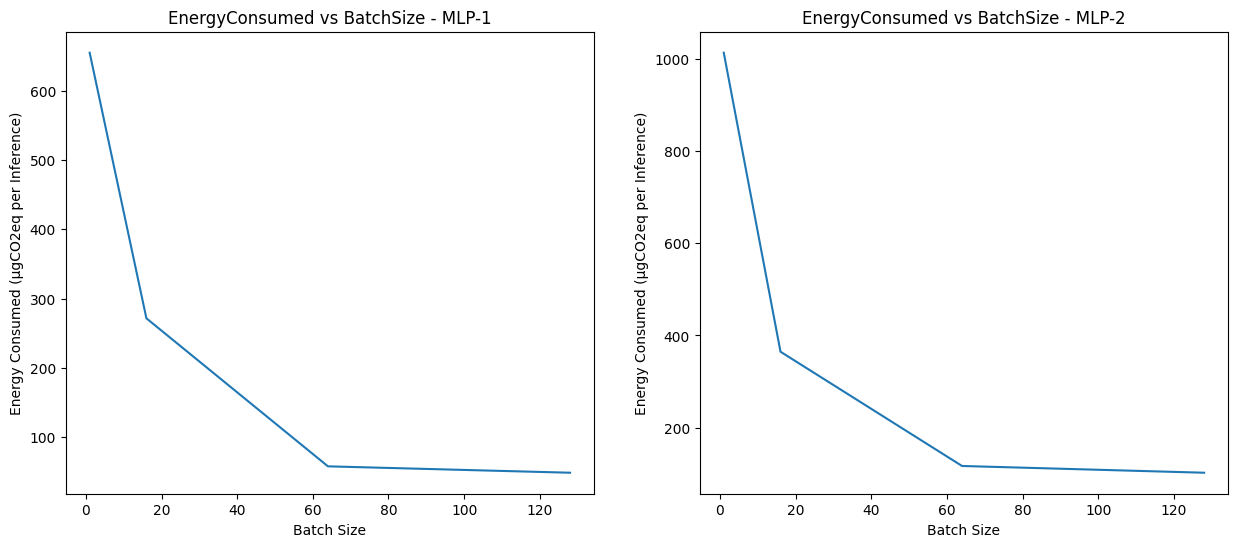

In [38]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(df1['BatchSize'],df1['EnergyConsumption'])
plt.title('EnergyConsumed vs BatchSize - MLP-1')
plt.xlabel('Batch Size')
plt.ylabel('Energy Consumed (\u03BCgCO2eq per Inference)')

plt.subplot(1,2,2)
plt.plot(df2['BatchSize'],df2['EnergyConsumption'])
plt.title('EnergyConsumed vs BatchSize - MLP-2')
plt.xlabel('Batch Size')
plt.ylabel('Energy Consumed (\u03BCgCO2eq per Inference)')
plt.show()

### MLP-1 vs MLP-2

In [63]:
df3 = df[df.BatchSize == 64]
df3

,#,Model,Arch,NumEpochs,BatchSize,ModelSize,Parameters,Flops,TrainingTimePerEpoch,InferenceLatency,Accuracy,EnergyConsumption
2,3,MLP-1,Input(784)-Hidden(1024)-Output(10),2,64,9.8,814090,1626112,8.57,5.1,96.4,58.2
6,7,MLP-2,Input(400)-Hidden(1024)-Hidden(1024)-Output(10),2,64,17.7,1470474,2936832,13.20,10.3,97.2,117.2


Text(0.5, 0, 'Model')

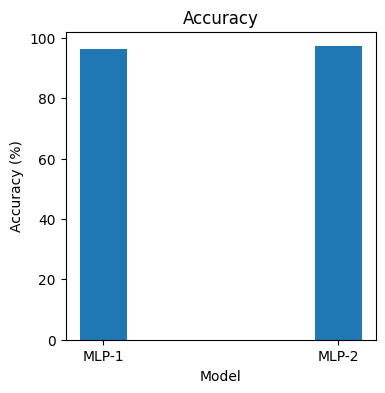

In [65]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['Accuracy'],width=0.2)
plt.title('Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

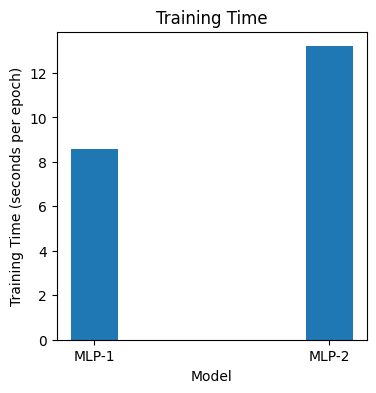

In [66]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['TrainingTimePerEpoch'],width=0.2)
plt.title('Training Time')
plt.ylabel('Training Time (seconds per epoch)')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

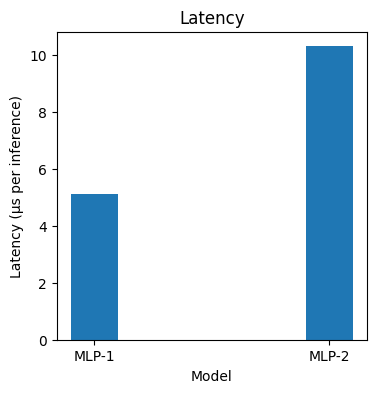

In [67]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['InferenceLatency'],width=0.2)
plt.ylabel('Latency (\u03BCs per inference)')
plt.title('Latency')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

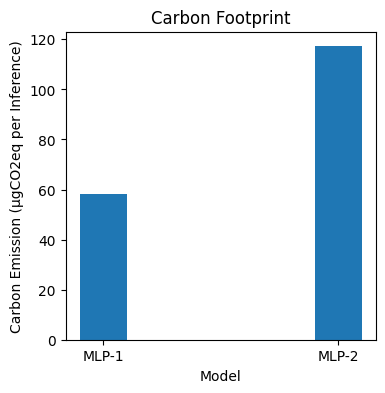

In [68]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['EnergyConsumption'],width=0.2)
plt.title('Carbon Footprint')
plt.ylabel('Carbon Emission (\u03BCgCO2eq per Inference)')
plt.xlabel('Model')

### MLP-5 vs LeNet-5

In [19]:
pt = './ref/mlp-vs-lenet.csv'
df3 = pd.read_csv(pt)
df3

,#,Model,Arch,NumEpochs,BatchSize,ModelSize,Parameters,Flops,TrainingTimePerEpoch,InferenceLatency,Accuracy,Carbon
0,1,MLP-5,Input(784)-Hidden(512)-Hidden(256)-Hidden(120)...,2,64,6.9,575102,1148240,4.50,5.9,95.7,18.3
1,2,LeNet-5,Input(784)-Conv(6*5*5)-AvgPooling-Conv(16*5*5)...,2,64,0.5,44426,2176080,6.87,21.8,97.8,69.0


Text(0.5, 0, 'Model')

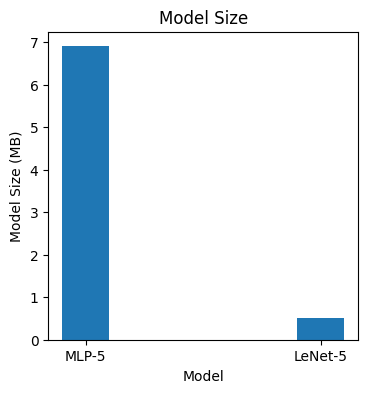

In [20]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['ModelSize'],width=0.2)
plt.title('Model Size')
plt.ylabel('Model Size (MB)')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

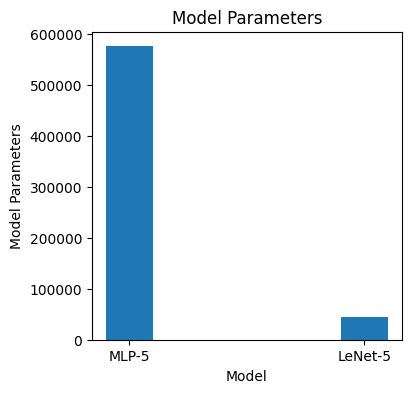

In [21]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['Parameters'],width=0.2)
plt.title('Model Parameters')
plt.ylabel('Model Parameters')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

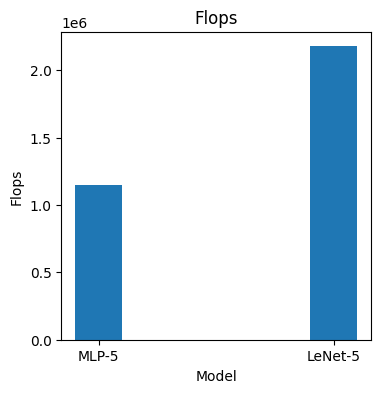

In [22]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['Flops'],width=0.2)
plt.title('Flops')
plt.ylabel('Flops')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

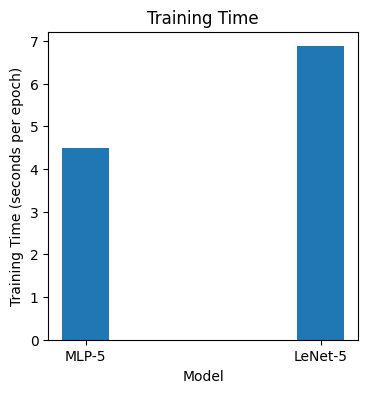

In [23]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['TrainingTimePerEpoch'],width=0.2)
plt.title('Training Time')
plt.ylabel('Training Time (seconds per epoch)')
plt.xlabel('Model')

Text(0.5, 0, 'Model')

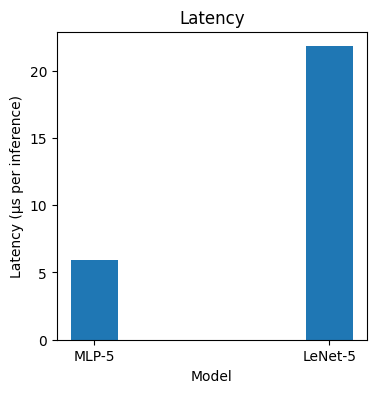

In [24]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['InferenceLatency'],width=0.2)
plt.ylabel('Latency (\u03BCs per inference)')
plt.title('Latency')
plt.xlabel('Model')

(90.0, 100.0)

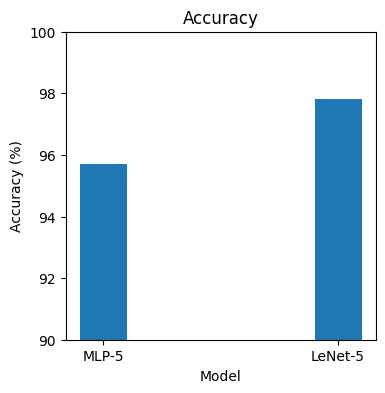

In [25]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['Accuracy'],width=0.2)
plt.title('Accuracy')
plt.ylabel('Accuracy (%)')
plt.xlabel('Model')
plt.ylim(90,100)

Text(0.5, 0, 'Model')

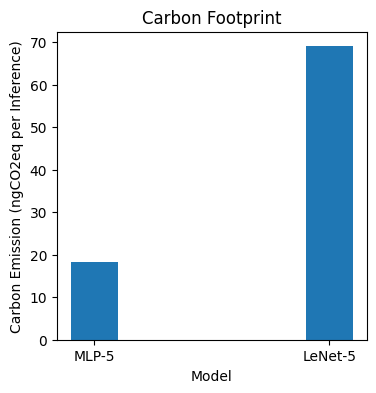

In [26]:
plt.figure(figsize=(4,4))
plt.bar(df3['Model'],df3['Carbon'],width=0.2)
plt.title('Carbon Footprint')
plt.ylabel('Carbon Emission (ngCO2eq per Inference)')
plt.xlabel('Model')